In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
data=pd.read_csv('fifa_eda.csv')
data

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,England,47,65,Crewe Alexandra,60.0,1.0,Right,1.0,2.0,CM,2017,2019-01-01,5.750000,134.0,143.0
18203,243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,60.0,1.0,Right,1.0,2.0,ST,2018,2020-01-01,6.250000,170.0,113.0
18204,241638,B. Worman,16,England,47,67,Cambridge United,60.0,1.0,Right,1.0,2.0,ST,2017,2021-01-01,5.666667,148.0,165.0
18205,246268,D. Walker-Rice,17,England,47,66,Tranmere Rovers,60.0,1.0,Right,1.0,2.0,RW,2018,2019-01-01,5.833333,154.0,143.0


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     17955 non-null  float64
 8   Wage                      18207 non-null  float64
 9   Preferred Foot            18207 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Skill Moves               18159 non-null  float64
 12  Position                  18207 non-null  object 
 13  Joined                    18207 non-null  int64  
 14  Contra

### 1)Data Cleaning

In [36]:
data.shape
#The data consists of 18207 samples/rows and 18 features/columns

(18207, 18)

In [37]:
data.isna().sum()

ID                            0
Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        241
Value                       252
Wage                          0
Preferred Foot                0
International Reputation     48
Skill Moves                  48
Position                      0
Joined                        0
Contract Valid Until        289
Height                        0
Weight                        0
Release Clause                0
dtype: int64

In [38]:
categorical_columns=[]
numerical_columns=[]
for column in data.columns:
    if(data[column].dtype=='object'):
        categorical_columns.append(column)
    else:
        numerical_columns.append(column)
print("The categorical columns are : ",categorical_columns)
print("The numerical columns are : ",numerical_columns)

The categorical columns are :  ['Name', 'Nationality', 'Club', 'Preferred Foot', 'Position', 'Contract Valid Until']
The numerical columns are :  ['ID', 'Age', 'Overall', 'Potential', 'Value', 'Wage', 'International Reputation', 'Skill Moves', 'Joined', 'Height', 'Weight', 'Release Clause']


In [39]:
nan_columns=[]
for column in data.columns:
    if(data[column].isna().sum()>0):
        nan_columns.append(column)
print(nan_columns)

['Club', 'Value', 'International Reputation', 'Skill Moves', 'Contract Valid Until']


### All the categorical columns having missing values must be replaced by mode the most frequently occuring item

In [40]:
for column in categorical_columns:
    if(column in nan_columns):
        data[column]=data[column].fillna(data[column].mode()[0])
        nan_columns.remove(column)

In [41]:
data.isna().sum()

ID                            0
Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                          0
Value                       252
Wage                          0
Preferred Foot                0
International Reputation     48
Skill Moves                  48
Position                      0
Joined                        0
Contract Valid Until          0
Height                        0
Weight                        0
Release Clause                0
dtype: int64

In [42]:
print(nan_columns)
#Remaining columns are numerical columns only so we will replace by mean/median

['Value', 'International Reputation', 'Skill Moves']


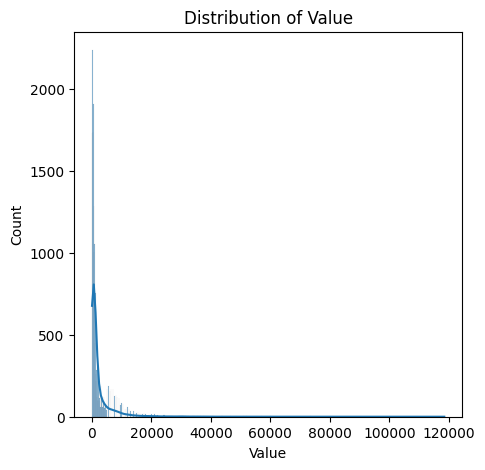

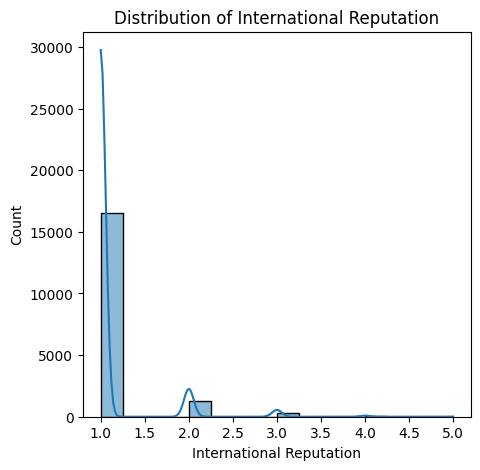

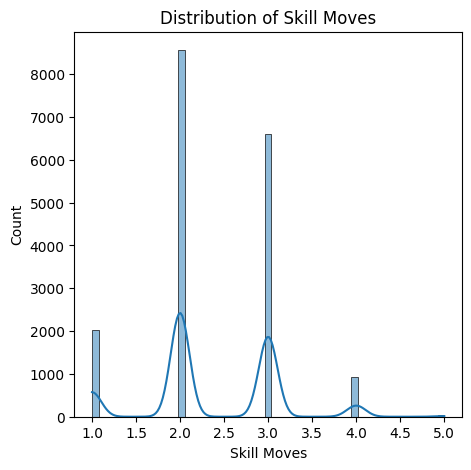

In [43]:
for column in nan_columns:
    plt.figure(figsize=(5,5))  
    sns.histplot(data[column], kde=True)  
    plt.title(f"Distribution of {column}")
    plt.show()


### The feature having symetric distribution should be filled with mean of data else if the feature has lot of outliers then it should be replaced by median<br>
-Here Value and International Reputation are skewed means with outliers having non symetrical distribution so we should replace these features by median<br>
-Skill moves has almost symetrical distribution so we can replace by mean<br>

In [44]:
data['Value']=data['Value'].fillna(data['Value'].median())
data['International Reputation']=data['International Reputation'].fillna(data['International Reputation'].median())
data['Skill Moves']=data['Skill Moves'].fillna(data['Skill Moves'].mean())

In [45]:
data.isna().sum()

ID                          0
Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Skill Moves                 0
Position                    0
Joined                      0
Contract Valid Until        0
Height                      0
Weight                      0
Release Clause              0
dtype: int64

In [46]:
data.duplicated().sum()

0

In [47]:
data.drop_duplicates(inplace=True)
data

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,England,47,65,Crewe Alexandra,60.0,1.0,Right,1.0,2.0,CM,2017,2019-01-01,5.750000,134.0,143.0
18203,243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,60.0,1.0,Right,1.0,2.0,ST,2018,2020-01-01,6.250000,170.0,113.0
18204,241638,B. Worman,16,England,47,67,Cambridge United,60.0,1.0,Right,1.0,2.0,ST,2017,2021-01-01,5.666667,148.0,165.0
18205,246268,D. Walker-Rice,17,England,47,66,Tranmere Rovers,60.0,1.0,Right,1.0,2.0,RW,2018,2019-01-01,5.833333,154.0,143.0


In [48]:
print(categorical_columns)

['Name', 'Nationality', 'Club', 'Preferred Foot', 'Position', 'Contract Valid Until']


In [49]:
for column in categorical_columns:
    print(data[column].unique())

['L. Messi' 'Cristiano Ronaldo' 'Neymar Jr' ... 'B. Worman'
 'D. Walker-Rice' 'G. Nugent']
['Argentina' 'Portugal' 'Brazil' 'Spain' 'Belgium' 'Croatia' 'Uruguay'
 'Slovenia' 'Poland' 'Germany' 'France' 'England' 'Italy' 'Egypt'
 'Colombia' 'Denmark' 'Gabon' 'Wales' 'Senegal' 'Costa Rica' 'Slovakia'
 'Netherlands' 'Bosnia Herzegovina' 'Morocco' 'Serbia' 'Algeria' 'Austria'
 'Greece' 'Chile' 'Sweden' 'Korea Republic' 'Finland' 'Guinea'
 'Montenegro' 'Armenia' 'Switzerland' 'Norway' 'Czech Republic' 'Scotland'
 'Ghana' 'Central African Rep.' 'DR Congo' 'Ivory Coast' 'Russia'
 'Ukraine' 'Iceland' 'Mexico' 'Jamaica' 'Albania' 'Venezuela' 'Japan'
 'Turkey' 'Ecuador' 'Paraguay' 'Mali' 'Nigeria' 'Cameroon'
 'Dominican Republic' 'Israel' 'Kenya' 'Hungary' 'Republic of Ireland'
 'Romania' 'United States' 'Cape Verde' 'Australia' 'Peru' 'Togo' 'Syria'
 'Zimbabwe' 'Angola' 'Burkina Faso' 'Iran' 'Estonia' 'Tunisia'
 'Equatorial Guinea' 'New Zealand' 'FYR Macedonia' 'United Arab Emirates'
 'China PR

### We can handle the year month date column effectively and split it into date month and year columns separately

In [54]:
import datetime as dt
data['Contract Valid Until']=pd.to_datetime(data['Contract Valid Until'])
data['day']=data['Contract Valid Until'].dt.day
data['month']=data['Contract Valid Until'].dt.month
data['year']=data['Contract Valid Until'].dt.year
data.drop(['Contract Valid Until'],axis=1,inplace=True)

In [55]:
data

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Height,Weight,Release Clause,day,month,year
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,5.583333,159.0,226500.0,1,1,2021
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,6.166667,183.0,127100.0,1,1,2022
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,5.750000,150.0,228100.0,1,1,2022
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,6.333333,168.0,138600.0,1,1,2020
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,5.916667,154.0,196400.0,1,1,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,England,47,65,Crewe Alexandra,60.0,1.0,Right,1.0,2.0,CM,2017,5.750000,134.0,143.0,1,1,2019
18203,243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,60.0,1.0,Right,1.0,2.0,ST,2018,6.250000,170.0,113.0,1,1,2020
18204,241638,B. Worman,16,England,47,67,Cambridge United,60.0,1.0,Right,1.0,2.0,ST,2017,5.666667,148.0,165.0,1,1,2021
18205,246268,D. Walker-Rice,17,England,47,66,Tranmere Rovers,60.0,1.0,Right,1.0,2.0,RW,2018,5.833333,154.0,143.0,1,1,2019


### Exploratory Data Analysis

1)Univariate Analysis

In [57]:
for column in numerical_columns:
    print(f"The mean of the {column} feature is ",data[column].mean())
    print(f"The median of the {column} feature is ",data[column].median())
    print(f"The mode of the {column} feature is ",data[column].mode()[0])
    print(f"The variance of the {column} feature is ",data[column].var())
    print(f"The skewness of the {column} feature is ",data[column].skew())
    print("---------------------------------------------------------------")
    print("---------------------------------------------------------------")

The mean of the ID feature is  214298.33860603065
The median of the ID feature is  221759.0
The mode of the ID feature is  16
The variance of the ID feature is  897915860.1913377
The skewness of the ID feature is  -2.2679826532276723
---------------------------------------------------------------
---------------------------------------------------------------
The mean of the Age feature is  25.122205745043114
The median of the Age feature is  25.0
The mode of the Age feature is  21
The variance of the Age feature is  21.80836494657141
The skewness of the Age feature is  0.3917641387687474
---------------------------------------------------------------
---------------------------------------------------------------
The mean of the Overall feature is  66.23869940132916
The median of the Overall feature is  66.0
The mode of the Overall feature is  66
The variance of the Overall feature is  47.7333083819523
The skewness of the Overall feature is  0.06718492227833812
-----------------------